# WeatherPy
----

### Analysis
* Latitude vs. Temperature: The weather becomes significantly warmer as one approaches the "tropical zone" on both sides of the equator (23.5S and 23.5N). The seasonal weather which is impacted by the Earth's axis tilt, can be seen the Northern Hemisphere due to the increase in the amount of sunshine driving warming which starts in April. 

* Latitude vs. Humidity: There is cluster of humid cities between the 70N and 80N latitudes. In April, there is relatively high percentage of water vapor pressure which may impact humidity more than latitude.
ftp://ftp.ncdc.noaa.gov/pub/data/special/modelnn_final.pdf

* Latitude vs. Cloudiness:  Cloudiness changes rapidly. Because of the hour to hour variability, looking at cloudiness at one point in time, a correlation to latitude may not be seen. Over time however, such as observations over a year or decades for example, such a correlation may be seen. 

* Latitude vs. Wind: The 'windspeed:latitude' model fails to address the global weather variables such as the Coriolis Effect, ocean currents, topography, and barometric pressure. The chart does show the "polar easterlies" in which the high pressure over the poles pushes the air away from the poles. The high-pressure area known as the "horse latitudes" can be seen in the 35N to 60N degrees latitude.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/rebeccajbooth/Documents/PythonStuff/Python APIs/API Homework/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


647

In [16]:
data = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #farenheight
city = "Phoenix"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q={city}"

# Create data frame to hold city weather data
column_names = ("City", "Cloudliness", "Country", "Date", "Humidity", "Lat", "Lng","Max Temp", "Wind Speed")
cities_weather_df = pd.DataFrame(columns = column_names)
cities_weather_df



,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#Iterate to get city weather data in OpenWeatherMap
row_index = 0
record_count = 1
set_count = 1

print("Beginning Data Retrieval\n"
      "-----------------------------"
        )

for city in cities:
    # Build query URL
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if weather_json["cod"] == 200:
        print("Processing Record", record_count, "of Set", set_count, "|", city)
        print(weather_response.url)
        city_name = weather_json["name"]
        cloud = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        
        # Append Weather Data without duplicating City
        if city_name not in cities_weather_df.City.values:
            cities_weather_df.at[row_index,"City"] = city_name
            cities_weather_df.at[row_index,"Cloudliness"] = cloud
            cities_weather_df.at[row_index, "Country"] = country
            cities_weather_df.at[row_index, "Date"] = date
            cities_weather_df.at[row_index, "Humidity"] = humidity
            cities_weather_df.at[row_index, "Lat"] = latitude
            cities_weather_df.at[row_index, "Lng"] = longitude
            cities_weather_df.at[row_index, "Max Temp"] = max_temp
            cities_weather_df.at[row_index, "Wind Speed"] = wind_speed
                  
            row_index += 1
            record_count += 1
            if record_count == 50:
                set_count += 1
                record_count = 0
        
            # Delay 1 sec before next loop
            time.sleep(1)
        else:
            pass
    
    elif weather_json["cod"] == 404:
        print("City not found. Skipping...")
           
    else:
        pass

print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=5aa08b04e85cd2be047c9be54ad15344&q=thompson&units=imperial
Processing Record 2 of Set 1 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=5aa08b04e85cd2be047c9be54ad15344&q=souillac&units=imperial
Processing Record 3 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=5aa08b04e85cd2be047c9be54ad15344&q=saskylakh&units=imperial
Processing Record 4 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?appid=5aa08b04e85cd2be047c9be54ad15344&q=albany&units=imperial
Processing Record 5 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=5aa08b04e85cd2be047c9be54ad15344&q=rikitea&units=imperial
Processing Record 6 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=5aa08b04e85cd2be047c9be54ad15344&q=kapaa&units=imperial
Processing Record 7 of Set 1 | kumphawapi
h

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
#Save city data to cities.csv
#first random 500 cities of total.
random_subset = cities_weather_df.sample(n=500, replace=True)
cities_weather_df = random_subset
cities_weather_df.to_csv(output_data_file, encoding="utf-8", index=False)

#Preview the dataframe
cities_weather_df.head()

,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
334,Roscrea,48,IE,1554227018,83,52.95,-7.8,42.01,21.16
31,Pechora,88,RU,1554226639,81,65.12,57.16,30.68,9.42
242,Bontang,76,ID,1554226934,100,0.12,117.47,76.4,5.06
445,Kungalv,0,SE,1554226933,30,57.87,11.98,48.99,11.41
483,Dire,0,ET,1554227265,70,9.18,38.92,54.62,2.59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

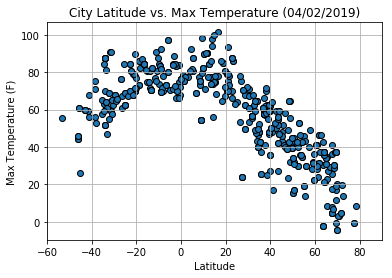

In [52]:

plt.scatter(cities_weather_df["Lat"], cities_weather_df["Max Temp"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)


# Save the figure
plt.savefig("/Users/rebeccajbooth/Documents/Images/latvtempapi.png",bbox_inches='tight',dpi=300)
plt.show()

#### Latitude vs. Humidity Plot

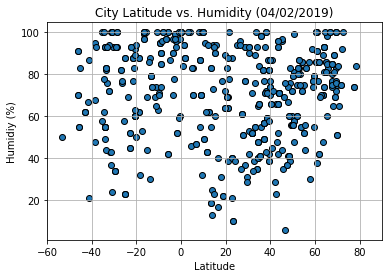

In [53]:
# City Latitude vs Humidity
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Humidity"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Humidiy (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

plt.savefig("/Users/rebeccajbooth/Documents/Images/latvhumapi.png",bbox_inches='tight',dpi=300)
plt.show()

#### Latitude vs. Cloudiness Plot

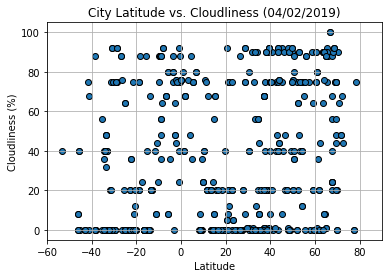

In [54]:
# City Latitude vs Cloudliness
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Cloudliness"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Cloudliness {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Cloudliness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)
         
# Save the figure
plt.savefig("/Users/rebeccajbooth/Documents/Images/latvnocloudspi.png",bbox_inches='tight',dpi=300)
plt.show()


#### Latitude vs. Wind Speed Plot

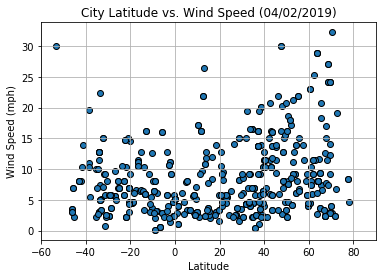

In [55]:
# City Latitude vs Wind Speed
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Wind Speed"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

# Save the figure
plt.savefig("/Users/rebeccajbooth/Documents/Images/latvwindspeedapi.png",bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
##Stay cool!